# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from sklearn import preprocessing
from sklearn.impute import SimpleImputer


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer



from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt 



In [3]:
import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [4]:
dataset=pd.read_csv('train.csv')

In [5]:
df=dataset.copy()

# Quick view of Dataset

### Data Description:

Column	Description                                                                                                             
* 1)customer_visit_score	            -->a score based on how regularly the customer visits the website                           
* 2)customer_product_search_score     -->quality or price range of product that the customer searches for.           For ex: a customer searching for a laptop will have more weightage than someone looking for a book                                                                                                                   
* 3)customer_ctr_score               	-->how many of the searched links does the customer click                                   
* 4)customer_stay_score	            -->a score based on the time spent on an avg. by the customer                               
* 5)customer_frequency_score	        -->a score based on how many times in a day the customer visit the website                 
* 6)customer_product_variation_score	-->a score based on how many varities of products does a customer search for, for ex.                                              electronics, apparels, etc.                                                             
* 7)customer_order_score	            -->Score based on the no. of orders that has been succesfully delivered and not returned   

* 8)customer_affinity_score           -->an internal overall score calculated which signifies the affinity of the customer                                                towards the website                                                                     
* 9)customer_category	                -->the cluster/group to which the customer should belong to                                 
* 10)customer_active_segment          -->the categorization of the customers based on their activity                             
* 11)X1	                            -->Anonymized feature based on loyalty of the customer                                     

In [6]:
df.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [7]:
df.sample(frac=0.001)

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
2980,csid_2981,27.513257,4.745385,-0.038186,-0.037010,0.805703,4.776071,3.259599,6.908507,C,F,0
4375,csid_4376,12.128072,7.005131,0.110508,0.016922,0.579214,4.423503,4.412129,18.503935,B,BA,0
5393,csid_5394,19.507952,4.839339,0.160985,0.134249,0.213727,3.637842,5.025590,55.013015,B,AA,0
7368,csid_7369,15.357306,5.608157,-0.012458,0.054513,0.767396,5.995761,2.672402,13.837690,C,A,0
1981,csid_1982,15.243351,7.942064,-0.002639,0.018104,0.913229,5.979652,2.002231,4.333603,B,BA,0
5279,csid_5280,13.544323,2.504528,0.166831,0.535960,0.343545,4.469099,3.386202,10.799984,B,A,0
5114,csid_5115,23.476416,NaN,0.182448,0.028646,0.538669,7.559161,2.567668,6.449880,C,F,1
2736,csid_2737,17.150686,2.454075,0.167949,0.837101,0.165505,3.541835,4.298533,58.894065,B,AA,0
2884,csid_2885,12.763423,4.247006,0.044267,0.022915,2.067332,6.841383,2.548584,1.933564,C,F,0
2827,csid_2828,22.681393,5.337830,0.082351,-0.132711,0.235606,4.414693,4.327366,26.798469,B,A,0


In [8]:
df.columns

Index(['customer_id', 'customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_active_segment', 'X1',
       'customer_category'],
      dtype='object')

In [9]:
df.shape

(10738, 12)

# EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       10738 non-null  object 
 1   customer_visit_score              10738 non-null  float64
 2   customer_product_search_score     10696 non-null  float64
 3   customer_ctr_score                10738 non-null  float64
 4   customer_stay_score               10701 non-null  float64
 5   customer_frequency_score          10738 non-null  float64
 6   customer_product_variation_score  10692 non-null  float64
 7   customer_order_score              10672 non-null  float64
 8   customer_affinity_score           10738 non-null  float64
 9   customer_active_segment           10715 non-null  object 
 10  X1                                10701 non-null  object 
 11  customer_category                 10738 non-null  int64  
dtypes: f

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_visit_score,10738.0,19.060941,7.419609,0.568965,13.518021,18.774109,24.501719,47.306691
customer_product_search_score,10696.0,5.274847,1.882559,-0.161940,3.971587,5.218479,6.520364,16.638243
customer_ctr_score,10738.0,0.175912,0.372829,-0.547989,0.010840,0.074078,0.159606,2.679474
customer_stay_score,10701.0,0.374230,1.222031,-0.462494,-0.027666,0.037201,0.179029,14.701914
customer_frequency_score,10738.0,2.376895,5.601911,0.028575,0.313610,0.516830,1.125380,52.395014
customer_product_variation_score,10692.0,5.788180,2.531309,2.752836,4.193234,4.842575,6.286400,18.743836
customer_order_score,10672.0,3.150071,1.035416,0.363338,2.454017,3.118394,3.756566,9.090206
customer_affinity_score,10738.0,17.061836,18.762693,-0.486834,4.530085,12.653357,23.114577,248.552755
customer_category,10738.0,0.120600,0.325677,0.000000,0.000000,0.000000,0.000000,1.000000


In [12]:
df.describe(include = 'object').T

,count,unique,top,freq
customer_id,10738,10738,csid_3600,1
customer_active_segment,10715,5,C,4919
X1,10701,5,BA,4511


It gives some statesticel info about data

#### Number of unique value in each feature

In [13]:
df.nunique()

customer_id                         10738
customer_visit_score                10738
customer_product_search_score       10696
customer_ctr_score                  10738
customer_stay_score                 10701
customer_frequency_score            10738
customer_product_variation_score    10692
customer_order_score                10672
customer_affinity_score             10738
customer_active_segment                 5
X1                                      5
customer_category                       2
dtype: int64

#### Check for null values in feature

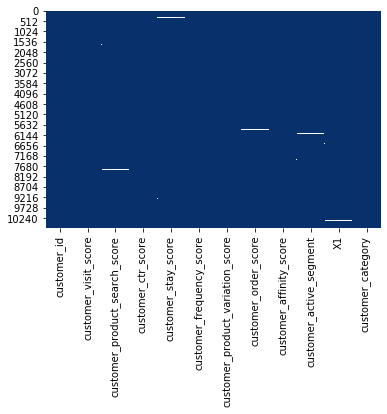

In [14]:
sns.heatmap(df.isnull(),cbar=False,cmap='Blues_r')

Some null values present in dataset.Now we find them and as dataset is big and from graph we get that not much null values present so we remove them.

In [15]:
df.isnull().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.drop_duplicates(inplace=True)

As customer_id is not required so drop it.

In [19]:
df.drop('customer_id',axis=1,inplace=True)

In [20]:
df.isnull().sum()

customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
customer_category                   0
dtype: int64

#### Now see distribution of features

In [21]:
lst=['customer_visit_score','customer_product_search_score',
'customer_ctr_score', 'customer_stay_score',
 'customer_frequency_score',      
 'customer_product_variation_score', 'customer_order_score' ,
 'customer_affinity_score' ]

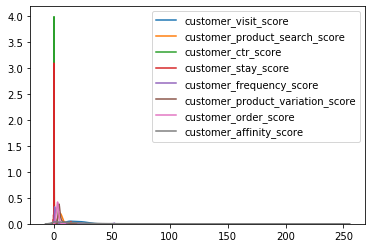

In [22]:
for i in lst[:]:
    sns.kdeplot(df[i])
    

From it clear that we need to standerdize and normalize features (scaling down)

In [23]:
df1=(df[lst]-df[lst].min())/(df[lst].std())

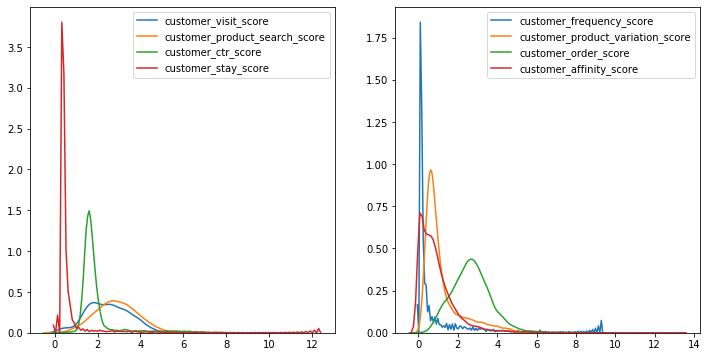

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
for i in lst[:4]:
    sns.kdeplot(df1[i])
plt.subplot(1,2,2)

for i in lst[4:]:
    sns.kdeplot(df1[i])

Some kdeplots are right skewed means outlies present.

In [25]:
df[lst]=df1[lst]

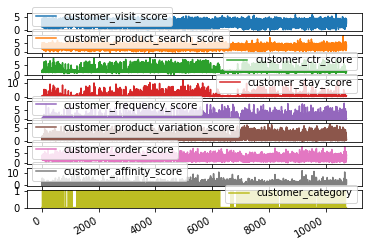

In [26]:
df.plot(subplots=True)
plt.show()

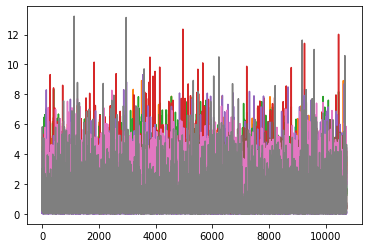

In [27]:
plt.plot(df[lst])
plt.show()

from this clear that most of values scaled down between 0 to 10

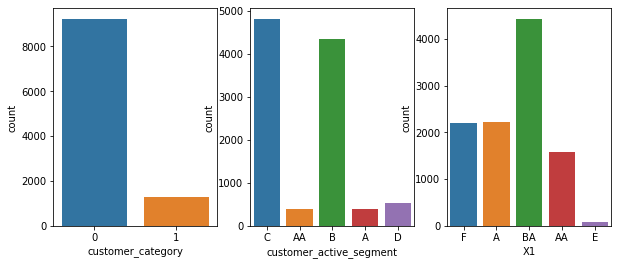

In [28]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.countplot('customer_category',data=df)
plt.subplot(1,3,2)
sns.countplot('customer_active_segment',data=df)
plt.subplot(1,3,3)
sns.countplot('X1',data=df)

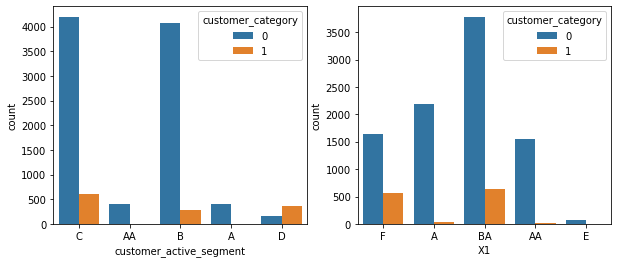

In [29]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot('customer_active_segment',hue='customer_category',data=df)
plt.subplot(1,2,2)
sns.countplot('X1',hue='customer_category',data=df)

From this it is clear that type 1 customer_category is much more less than type 0 customer_category.

In [30]:
lst=['customer_visit_score','customer_product_search_score',
'customer_ctr_score', 'customer_stay_score',
 'customer_frequency_score',      
 'customer_product_variation_score', 'customer_order_score' ,
 'customer_affinity_score' ]

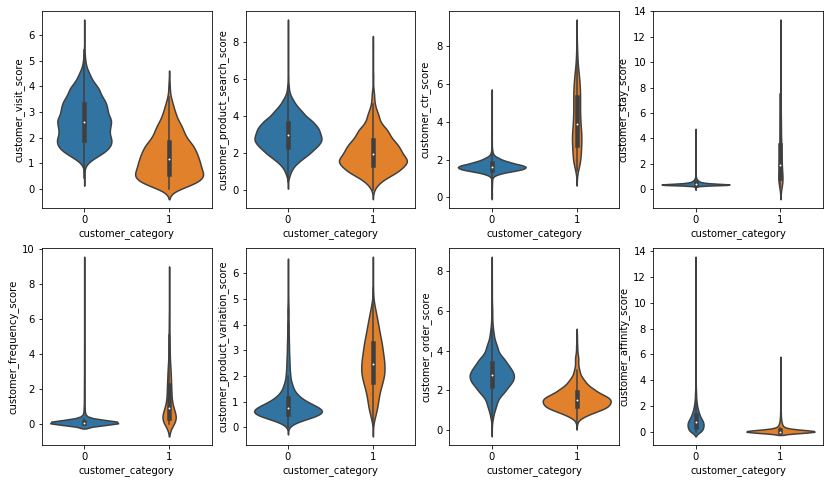

In [31]:
plt.figure(figsize=(14,8))
plt.subplot(2,4,1)
sns.violinplot('customer_category','customer_visit_score',data=df)
plt.subplot(2,4,2)
sns.violinplot('customer_category','customer_product_search_score',data=df)
plt.subplot(2,4,3)
sns.violinplot('customer_category','customer_ctr_score',data=df)
plt.subplot(2,4,4)
sns.violinplot('customer_category','customer_stay_score',data=df)
plt.subplot(2,4,5)
sns.violinplot('customer_category','customer_frequency_score',data=df)
plt.subplot(2,4,6)
sns.violinplot('customer_category','customer_product_variation_score',data=df)
plt.subplot(2,4,7)
sns.violinplot('customer_category','customer_order_score',data=df)
plt.subplot(2,4,8)
sns.violinplot('customer_category','customer_affinity_score',data=df)


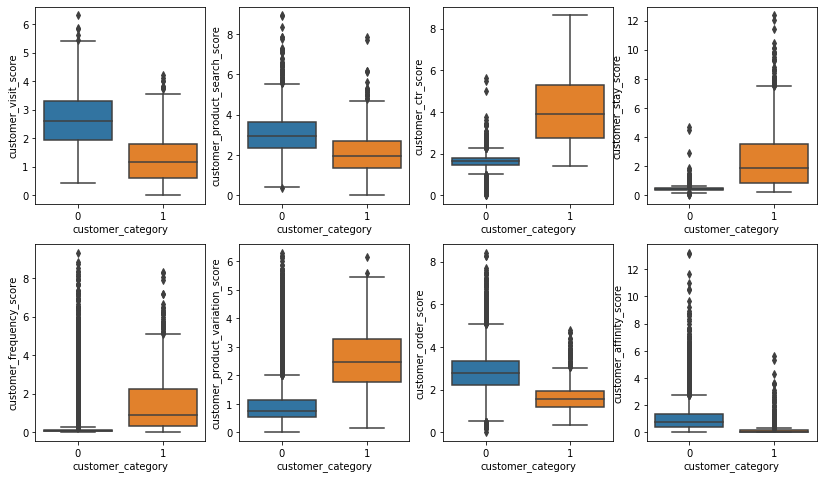

In [32]:
plt.figure(figsize=(14,8))
plt.subplot(2,4,1)
sns.boxplot('customer_category','customer_visit_score',data=df)
plt.subplot(2,4,2)
sns.boxplot('customer_category','customer_product_search_score',data=df)
plt.subplot(2,4,3)
sns.boxplot('customer_category','customer_ctr_score',data=df)
plt.subplot(2,4,4)
sns.boxplot('customer_category','customer_stay_score',data=df)
plt.subplot(2,4,5)
sns.boxplot('customer_category','customer_frequency_score',data=df)
plt.subplot(2,4,6)
sns.boxplot('customer_category','customer_product_variation_score',data=df)
plt.subplot(2,4,7)
sns.boxplot('customer_category','customer_order_score',data=df)
plt.subplot(2,4,8)
sns.boxplot('customer_category','customer_affinity_score',data=df)


here we see more number of outlies present in customer_frequency_score and customer_prouct_validation_score
and customer_affinity_score

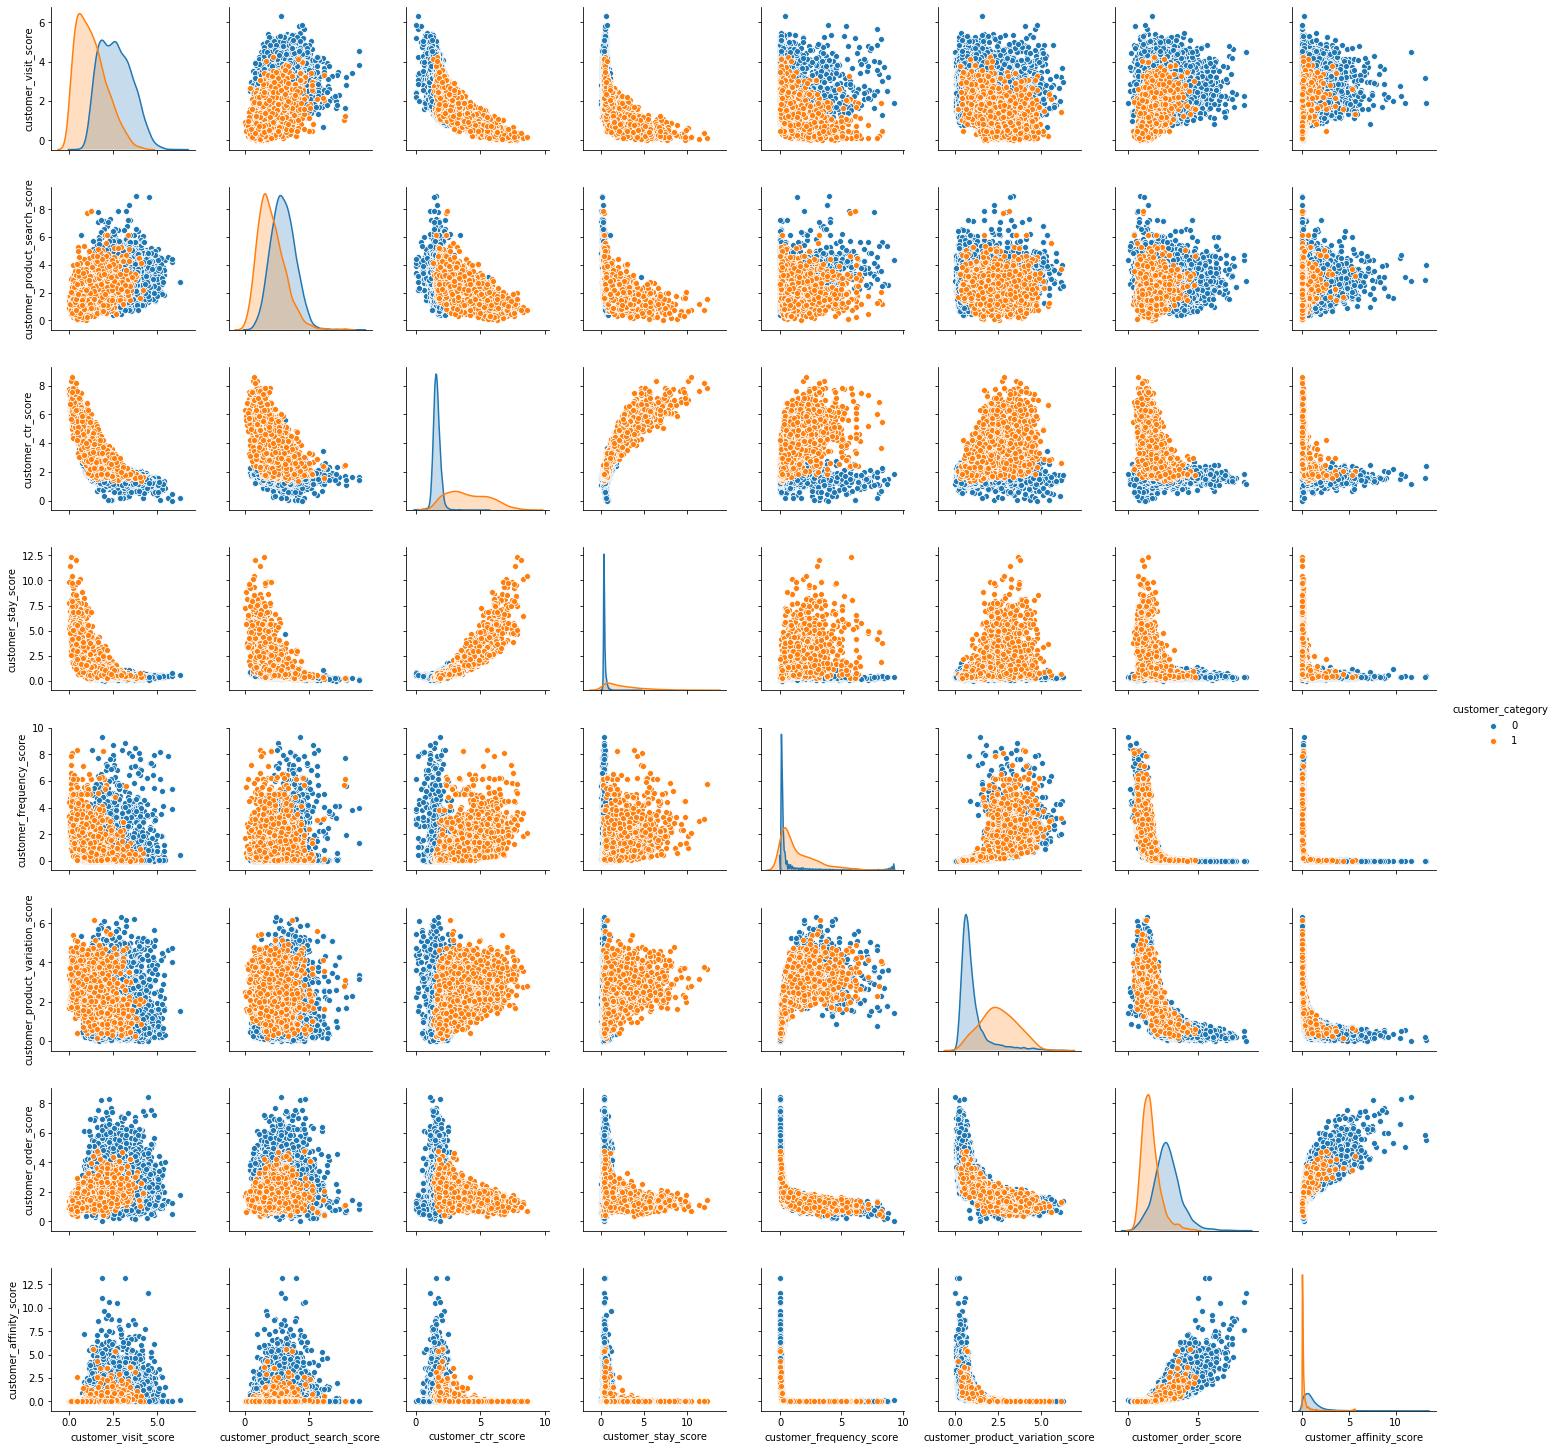

In [33]:
sns.pairplot(df,hue='customer_category')

In [34]:
 corr_matrix=df.corr()

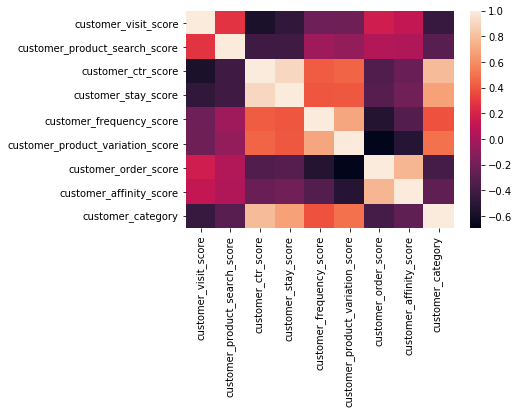

In [35]:
sns.heatmap(corr_matrix)

Looks like some features highly correlated with each other                   
(customer_ctr_score and customer_stay_score)

In [36]:
corr_matrix

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
customer_visit_score,1.000000,0.275355,-0.569854,-0.475129,-0.211943,-0.221562,0.171515,0.118932,-0.449501
customer_product_search_score,0.275355,1.000000,-0.415561,-0.414471,-0.022742,-0.065763,0.049241,0.043319,-0.300151
customer_ctr_score,-0.569854,-0.415561,1.000000,0.909241,0.421412,0.448735,-0.343172,-0.232725,0.793852
customer_stay_score,-0.475129,-0.414471,0.909241,1.000000,0.402413,0.407295,-0.312002,-0.210212,0.678401
customer_frequency_score,-0.211943,-0.022742,0.421412,0.402413,1.000000,0.701687,-0.533257,-0.325495,0.390522
customer_product_variation_score,-0.221562,-0.065763,0.448735,0.407295,0.701687,1.000000,-0.694472,-0.524955,0.493653
customer_order_score,0.171515,0.049241,-0.343172,-0.312002,-0.533257,-0.694472,1.000000,0.764188,-0.385063
customer_affinity_score,0.118932,0.043319,-0.232725,-0.210212,-0.325495,-0.524955,0.764188,1.000000,-0.272859
customer_category,-0.449501,-0.300151,0.793852,0.678401,0.390522,0.493653,-0.385063,-0.272859,1.000000


customer_ctr_score and customer_stay_score these feature correlated with each other mote then 0.9 so remove one of them whichis less correlated with target feature.

In [37]:
corr_matrix['customer_category'].sort_values(ascending=False)

customer_category                   1.000000
customer_ctr_score                  0.793852
customer_stay_score                 0.678401
customer_product_variation_score    0.493653
customer_frequency_score            0.390522
customer_affinity_score            -0.272859
customer_product_search_score      -0.300151
customer_order_score               -0.385063
customer_visit_score               -0.449501
Name: customer_category, dtype: float64

so we drop customer_stay_score feature.

In [38]:
#df.drop('customer_stay_score',axis=1,inplace=True)

In [39]:
df.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,1.700162,5.102657,1.277024,0.263129,0.072582,0.769940,2.096687,0.448428,C,F,0
1,2.229739,3.977686,1.874395,0.293124,0.062519,0.572569,3.692799,0.955869,C,A,0
2,2.285382,2.817259,1.749872,0.590967,0.069150,0.680567,3.389600,0.694541,C,BA,0
3,4.163474,2.697288,1.410601,0.294917,0.133218,0.907838,2.261513,0.280424,AA,F,0
4,1.530284,2.335857,1.964949,0.517685,0.023725,0.272983,3.195216,3.032748,C,AA,0


In [40]:
df.customer_category.value_counts()

0    9222
1    1269
Name: customer_category, dtype: int64

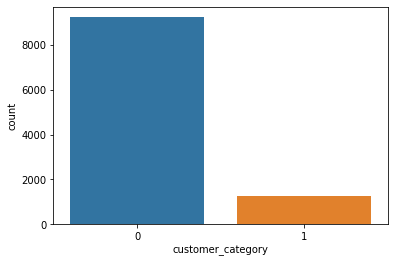

0    9222
1    1269
Name: customer_category, dtype: int64


In [41]:
# Plot Distribution
sns.countplot(x='customer_category',data=df)
plt.show()

# What are the counts?
print(df.customer_category.value_counts())

# What is the percentage?
count_yes = len(df[df.customer_category == 'yes'])
count_no = len(df[df.customer_category != 'yes'])

percent_success = (count_yes/(count_yes + count_no))*100


In [42]:
df.dtypes

customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_stay_score                 float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_active_segment              object
X1                                   object
customer_category                     int64
dtype: object

In [43]:
col = ['X1','customer_active_segment','customer_category']
df[col] = df[col].astype('category')

In [44]:
df.dtypes

customer_visit_score                 float64
customer_product_search_score        float64
customer_ctr_score                   float64
customer_stay_score                  float64
customer_frequency_score             float64
customer_product_variation_score     float64
customer_order_score                 float64
customer_affinity_score              float64
customer_active_segment             category
X1                                  category
customer_category                   category
dtype: object

In [45]:
num_col = list(df.columns.difference(col))

In [46]:
num_col

['customer_affinity_score',
 'customer_ctr_score',
 'customer_frequency_score',
 'customer_order_score',
 'customer_product_search_score',
 'customer_product_variation_score',
 'customer_stay_score',
 'customer_visit_score']

In [47]:
cat_col = col.copy()

In [48]:
df.isnull().sum()

customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
customer_category                   0
dtype: int64

In [49]:
df.dtypes

customer_visit_score                 float64
customer_product_search_score        float64
customer_ctr_score                   float64
customer_stay_score                  float64
customer_frequency_score             float64
customer_product_variation_score     float64
customer_order_score                 float64
customer_affinity_score              float64
customer_active_segment             category
X1                                  category
customer_category                   category
dtype: object

In [50]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['X1']= label_encoder.fit_transform(df['X1']) 
df['customer_active_segment']= label_encoder.fit_transform(df['customer_active_segment']) 
print("X1: ",df['X1'].unique())
print("customer_active_segment: ",df['customer_active_segment'].unique())


X1:  [4 0 2 1 3]
customer_active_segment:  [3 1 2 0 4]


### Test Data

In [148]:
tdf = pd.read_csv("test.csv")

In [149]:
td = pd.read_csv("test.csv")

In [150]:
tdf.isnull().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64

In [164]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(tdf)
SimpleImputer()
#X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(tdf))

[[ 2.25001740e+01  3.70214478e+00  1.18811429e-01 ...  7.66171552e+00
   2.00000000e+00  2.00000000e+00]
 [ 1.32259504e+01  3.60010183e+00  1.30985241e-01 ...  3.39996787e+01
   2.00000000e+00  1.00000000e+00]
 [ 1.46033758e+01  5.08404728e+00 -4.65086977e-03 ...  3.34856304e+01
   2.00000000e+00  1.00000000e+00]
 ...
 [ 1.11607200e+01  5.01985885e+00  5.38642476e-02 ...  6.16081933e-01
   3.00000000e+00  2.00000000e+00]
 [ 1.71400196e+01  9.26903688e+00  5.99107480e-02 ...  2.69394934e+01
   3.00000000e+00  2.00000000e+00]
 [ 1.06988354e+01  1.21733313e+01  4.75468676e-01 ...  1.33972565e-01
   2.00000000e+00  2.00000000e+00]]


In [165]:
tdf

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,2,2
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,2,1
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,2,1
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,2,2
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,3,2
...,...,...,...,...,...,...,...,...,...,...
7155,18.164300,7.240835,-0.056238,-0.177289,0.336608,4.043067,4.758199,68.052717,3,1
7156,25.363705,4.881059,0.038720,0.054397,2.452571,7.582251,1.823892,2.080245,3,2
7157,11.160720,5.019859,0.053864,-0.102337,4.968183,8.585355,2.422193,0.616082,3,2
7158,17.140020,9.269037,0.059911,-0.004299,0.357399,4.193971,3.715392,26.939493,3,2


tdf.dropna(inplace=True)

#tdf.duplicated().sum()
tdf.drop_duplicates(inplace=True)
tdf.drop('customer_id',axis=1,inplace=True)

In [166]:
tdf.isnull().sum()

customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
dtype: int64

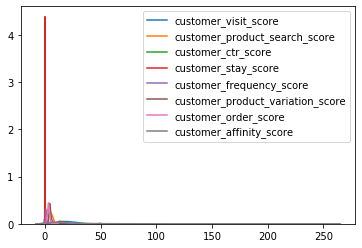

In [154]:
for i in lst[:]:
    sns.kdeplot(tdf[i])
    

In [167]:
tdf1=(tdf[lst]-tdf[lst].min())/(tdf[lst].std())

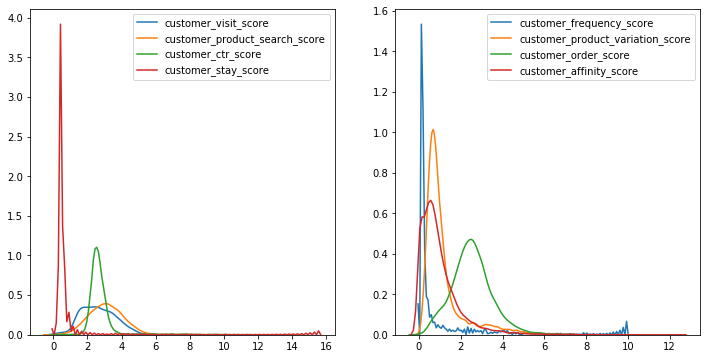

In [168]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
for i in lst[:4]:
    sns.kdeplot(tdf1[i])
plt.subplot(1,2,2)

for i in lst[4:]:
    sns.kdeplot(tdf1[i])

In [169]:
col = ['X1','customer_active_segment']
tdf[col] = tdf[col].astype('category')

In [170]:
tdf.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,2,2
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,2,1
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,2,1
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,2,2
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,3,2


In [171]:
num_col = list(tdf.columns.difference(col))

In [172]:
tdf.dtypes

customer_visit_score                 float64
customer_product_search_score        float64
customer_ctr_score                   float64
customer_stay_score                  float64
customer_frequency_score             float64
customer_product_variation_score     float64
customer_order_score                 float64
customer_affinity_score              float64
customer_active_segment             category
X1                                  category
dtype: object

In [173]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
tdf['X1']= label_encoder.fit_transform(tdf['X1']) 
tdf['customer_active_segment']= label_encoder.fit_transform(tdf['customer_active_segment']) 
print("X1: ",tdf['X1'].unique())
print("customer_active_segment: ",tdf['customer_active_segment'].unique())


X1:  [2 1 0 4 3]
customer_active_segment:  [2 3 0 1 4]


## Train Test SPlit

In [174]:
X, y = df.loc[:,df.columns!='customer_category'], df.loc[:,'customer_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify =y,random_state=3)

In [175]:
X_train.shape, y_train.shape

((7343, 10), (7343,))

In [176]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [177]:
X_train.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
8910,2.010823,3.920655,1.255178,0.370442,0.112455,0.551270,2.245616,0.710938,3,0
5161,2.713356,4.150926,1.946824,0.360909,0.102786,0.159085,3.674529,0.928522,3,0
1277,1.697534,3.491339,1.546113,0.358548,0.017837,0.362785,2.794919,3.302962,2,1
7320,2.284397,2.429389,1.549203,0.453212,0.080038,0.205362,3.788742,1.348314,2,2
10439,2.177358,2.323675,1.746905,0.794239,0.028392,0.646758,4.727986,2.394797,3,1


In [178]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [179]:
traine_pred = gnb.predict(X_train)
teste_pred = gnb.predict(X_test)

In [180]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.945997458703939


In [181]:

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

def model_evaluation(y_train, pred_train, y_test, pred_test) :
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, pred_train))
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================''')
    print(classification_report(y_test, pred_test))

In [182]:
print(classification_report(y_train,traine_pred))
print('\n---Test---\n')
print(classification_report(y_test,teste_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6455
           1       0.72      0.83      0.77       888

    accuracy                           0.94      7343
   macro avg       0.85      0.89      0.87      7343
weighted avg       0.95      0.94      0.94      7343


---Test---

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2767
           1       0.75      0.84      0.79       381

    accuracy                           0.95      3148
   macro avg       0.86      0.90      0.88      3148
weighted avg       0.95      0.95      0.95      3148



In [183]:
tdf

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,2,2
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,2,1
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,2,1
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,2,2
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,3,2
...,...,...,...,...,...,...,...,...,...,...
7155,18.164300,7.240835,-0.056238,-0.177289,0.336608,4.043067,4.758199,68.052717,3,1
7156,25.363705,4.881059,0.038720,0.054397,2.452571,7.582251,1.823892,2.080245,3,2
7157,11.160720,5.019859,0.053864,-0.102337,4.968183,8.585355,2.422193,0.616082,3,2
7158,17.140020,9.269037,0.059911,-0.004299,0.357399,4.193971,3.715392,26.939493,3,2


In [184]:
teste_pred = gnb.predict(tdf)

In [185]:
td

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA
...,...,...,...,...,...,...,...,...,...,...,...
7155,csid_17894,18.164300,7.240835,-0.056238,-0.177289,0.336608,4.043067,4.758199,68.052717,C,AA
7156,csid_17895,25.363705,4.881059,0.038720,0.054397,2.452571,7.582251,1.823892,2.080245,C,BA
7157,csid_17896,11.160720,5.019859,0.053864,-0.102337,4.968183,8.585355,2.422193,0.616082,C,BA
7158,csid_17897,17.140020,9.269037,0.059911,-0.004299,0.357399,4.193971,3.715392,26.939493,C,BA


In [189]:
final=pd.DataFrame({'customer_id':td['customer_id'],'customer_category':teste_pred})
final = final.set_index('customer_id')
final.to_csv("gnb_output.csv")
final

ValueError: array length 6995 does not match index length 7160

In [86]:
from imblearn.over_sampling import SMOTEa


In [88]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 888
Before OverSampling, counts of label '0': 6455 

After OverSampling, the shape of train_X: (12910, 10)
After OverSampling, the shape of train_y: (12910,) 

After OverSampling, counts of label '1': 6455
After OverSampling, counts of label '0': 6455


In [90]:
print(X_train.shape)
print(X_train_res.shape)
print(X_test.shape)

(7343, 10)
(12910, 10)
(3148, 10)


In [91]:
#DecisionTree = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])
DecisionTree = DecisionTreeClassifier()

In [92]:

DecisionTree.fit(X_train_res,y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [94]:
DT_train_pred = DecisionTree.predict(X_train_res)
DT_test_pred = DecisionTree.predict(X_test)

In [96]:
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, classification_report

In [97]:
print(precision_score(y_train_res, DT_train_pred, average='macro'))
print(precision_score(y_test, DT_test_pred, average='macro'))

1.0
0.8483475914777583


In [98]:
DecisionTree.feature_importances_

array([0.0284288 , 0.02366266, 0.79491891, 0.02529733, 0.01910655,
       0.05281579, 0.02450516, 0.01238476, 0.01321098, 0.00566907])

In [99]:

importances = DecisionTree.feature_importances_
indices = np.argsort(importances)
print(indices)

[9 7 8 4 1 6 3 0 5 2]


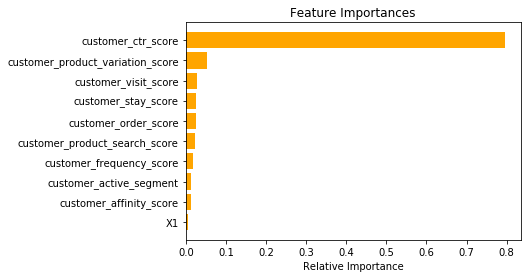

In [101]:

features = X_train.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='orange')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [110]:
test_data_pred = DecisionTree.predict(tdf)

## Logistic Regression

In [102]:

#Log_Reg = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
lr = LogisticRegression()

In [103]:
lr.fit(X_train_res,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
Log_train_pred = lr.predict(X_train_res)
Log_test_pred = lr.predict(X_test)

In [105]:
print(precision_score(y_train_res, Log_train_pred, average='macro'))
print(precision_score(y_test, Log_test_pred, average='macro'))

0.939927819229005
0.8973660496425151


In [108]:
test_data_pred = lr.predict(tdf)

In [109]:
test_data_pred


array([0, 0, 0, ..., 0, 0, 0])